In [1]:
%cd ../
%matplotlib inline

/home/work/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
mini_pieman = niidb.FMriActivationsDb('data/mini_pieman.db',
                                     mask='data/pieman_data/wholebrain.nii.gz')

In [5]:
dtfa = DTFA.DeepTFA(mini_pieman.all(), mask='data/pieman_data/wholebrain.nii.gz', num_factors=25, embedding_dim=2)

05/22/2018 22:17:11 Loading Nifti image data/pieman_data/sub-002-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False)
05/22/2018 22:17:16 Loading Nifti image data/pieman_data/sub-003-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False)
05/22/2018 22:17:21 Loading Nifti image data/pieman_data/sub-001-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False)


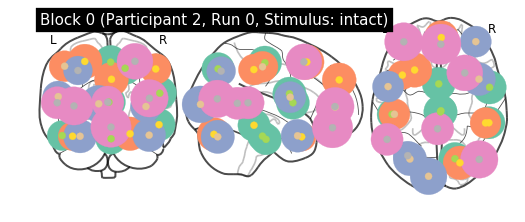

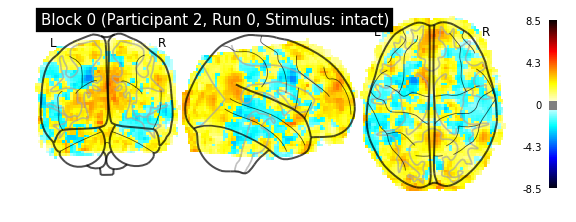

05/22/2018 22:19:22 Reconstruction Error (Frobenius Norm): 7.63362109e+03 out of 5.19532812e+03


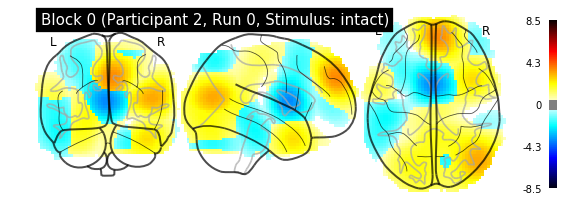

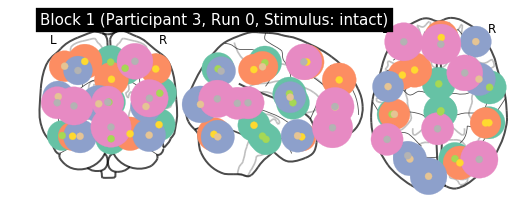

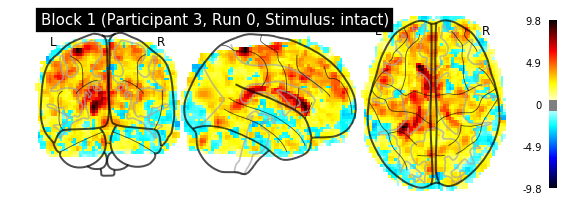

05/22/2018 22:20:39 Reconstruction Error (Frobenius Norm): 7.63362500e+03 out of 5.19532959e+03


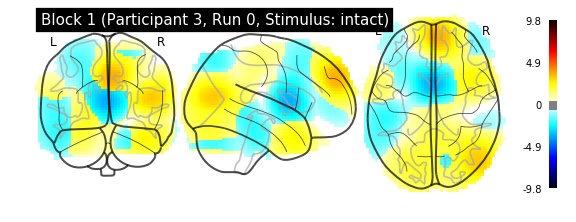

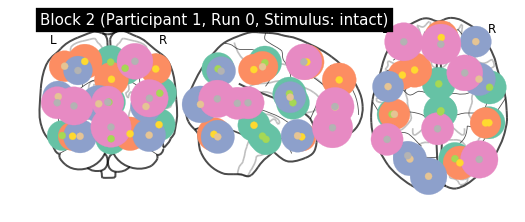

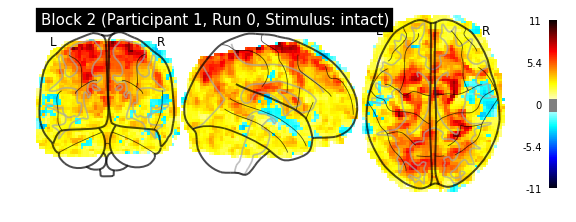

05/22/2018 22:21:34 Reconstruction Error (Frobenius Norm): 7.55881982e+03 out of 5.08477588e+03


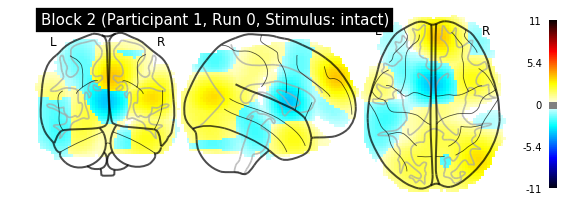

In [6]:
for b in range(dtfa.num_blocks):
    dtfa.plot_factor_centers(b)
    dtfa.plot_original_brain(b)
    dtfa.plot_reconstruction(b)

In [7]:
losses = dtfa.train(num_steps=500, learning_rate=5e-3, log_level=logging.INFO, num_particles=2,
                    batch_size=128, use_cuda=True, checkpoint_steps=10, blocks_batch_size=8, patience=20)

05/22/2018 22:21:45 [Epoch 1] (10356ms) Posterior free-energy 1.73045985e+10
05/22/2018 22:21:45 Saving checkpoint...
05/22/2018 22:21:56 [Epoch 2] (11490ms) Posterior free-energy 1.57279457e+10
05/22/2018 22:22:07 [Epoch 3] (11121ms) Posterior free-energy 1.49573161e+10
05/22/2018 22:22:18 [Epoch 4] (10241ms) Posterior free-energy 1.41281321e+10
05/22/2018 22:22:28 [Epoch 5] (10076ms) Posterior free-energy 1.36155556e+10
05/22/2018 22:22:38 [Epoch 6] (9868ms) Posterior free-energy 1.27914189e+10
05/22/2018 22:22:47 [Epoch 7] (9942ms) Posterior free-energy 1.22981591e+10
05/22/2018 22:22:57 [Epoch 8] (9449ms) Posterior free-energy 1.15577836e+10
05/22/2018 22:23:06 [Epoch 9] (9100ms) Posterior free-energy 1.13103237e+10
05/22/2018 22:23:15 [Epoch 10] (9079ms) Posterior free-energy 1.07484887e+10
05/22/2018 22:23:24 [Epoch 11] (9314ms) Posterior free-energy 1.03199939e+10
05/22/2018 22:23:24 Saving checkpoint...
05/22/2018 22:23:35 [Epoch 12] (10094ms) Posterior free-energy 9.70551091e+

Epoch   208: reducing learning rate of group 0 to 5.0000e-04.


05/22/2018 22:53:35 [Epoch 210] (9116ms) Posterior free-energy 7.53260902e+09
05/22/2018 22:53:44 [Epoch 211] (8826ms) Posterior free-energy 7.48649421e+09
05/22/2018 22:53:44 Saving checkpoint...
05/22/2018 22:53:53 [Epoch 212] (8907ms) Posterior free-energy 7.48600474e+09
05/22/2018 22:54:02 [Epoch 213] (9028ms) Posterior free-energy 7.46916250e+09
05/22/2018 22:54:11 [Epoch 214] (8970ms) Posterior free-energy 7.46056653e+09
05/22/2018 22:54:20 [Epoch 215] (8875ms) Posterior free-energy 7.45441638e+09
05/22/2018 22:54:29 [Epoch 216] (9117ms) Posterior free-energy 7.45223475e+09
05/22/2018 22:54:38 [Epoch 217] (8935ms) Posterior free-energy 7.45211853e+09
05/22/2018 22:54:47 [Epoch 218] (9144ms) Posterior free-energy 7.46189107e+09
05/22/2018 22:54:56 [Epoch 219] (9019ms) Posterior free-energy 7.44919859e+09
05/22/2018 22:55:05 [Epoch 220] (9112ms) Posterior free-energy 7.44443597e+09
05/22/2018 22:55:14 [Epoch 221] (8828ms) Posterior free-energy 7.44617933e+09
05/22/2018 22:55:14 Sav

Epoch   266: reducing learning rate of group 0 to 5.0000e-05.


05/22/2018 23:02:16 [Epoch 268] (9190ms) Posterior free-energy 7.44202906e+09
05/22/2018 23:02:26 [Epoch 269] (9127ms) Posterior free-energy 7.44060211e+09
05/22/2018 23:02:35 [Epoch 270] (9074ms) Posterior free-energy 7.43735808e+09
05/22/2018 23:02:44 [Epoch 271] (8956ms) Posterior free-energy 7.44390042e+09
05/22/2018 23:02:44 Saving checkpoint...
05/22/2018 23:02:53 [Epoch 272] (8906ms) Posterior free-energy 7.44056269e+09
05/22/2018 23:03:02 [Epoch 273] (9285ms) Posterior free-energy 7.43853670e+09
05/22/2018 23:03:11 [Epoch 274] (8940ms) Posterior free-energy 7.44013056e+09
05/22/2018 23:03:20 [Epoch 275] (8814ms) Posterior free-energy 7.44133427e+09
05/22/2018 23:03:29 [Epoch 276] (9011ms) Posterior free-energy 7.44118221e+09
05/22/2018 23:03:37 [Epoch 277] (8872ms) Posterior free-energy 7.44428851e+09
05/22/2018 23:03:46 [Epoch 278] (9012ms) Posterior free-energy 7.44429619e+09
05/22/2018 23:03:56 [Epoch 279] (9147ms) Posterior free-energy 7.44272845e+09
05/22/2018 23:04:05 [Ep

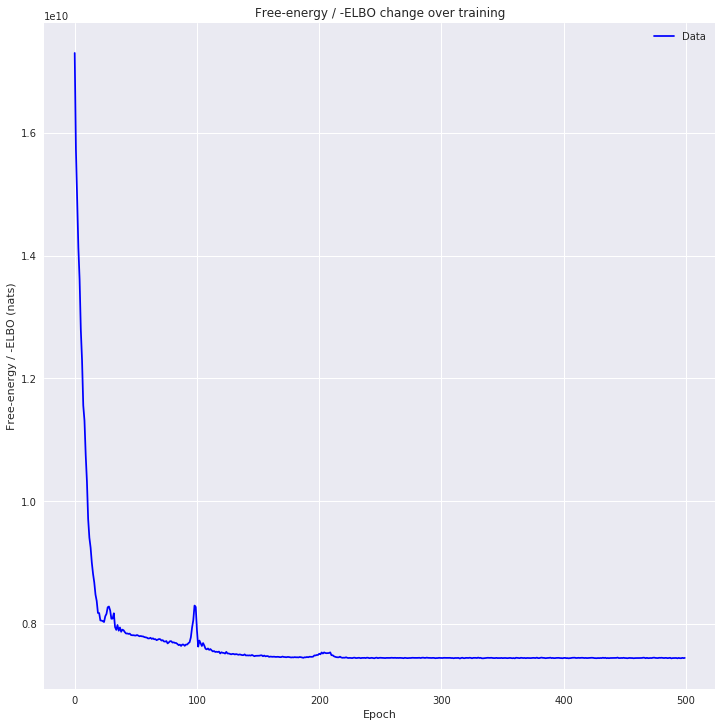

In [8]:
utils.plot_losses(losses)

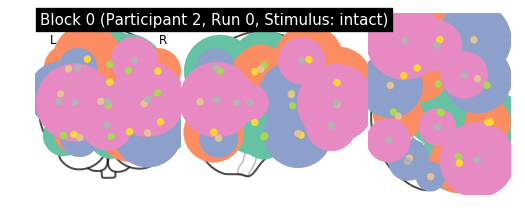

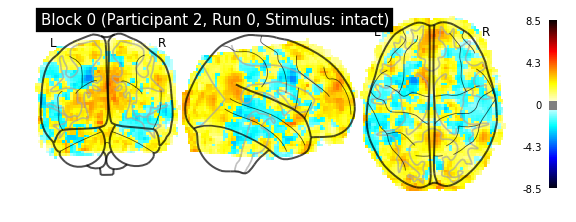

05/22/2018 23:38:03 Reconstruction Error (Frobenius Norm): 4.99850439e+03 out of 5.19532812e+03


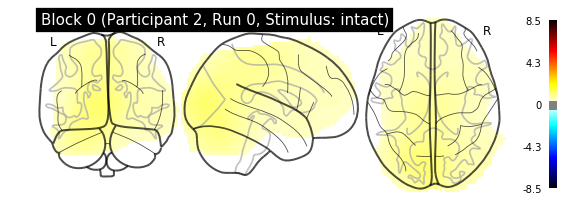

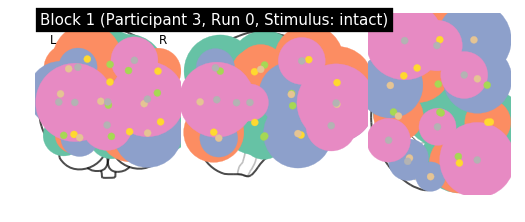

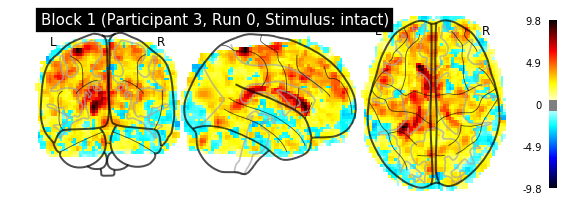

05/22/2018 23:38:57 Reconstruction Error (Frobenius Norm): 5.11658203e+03 out of 5.19532959e+03


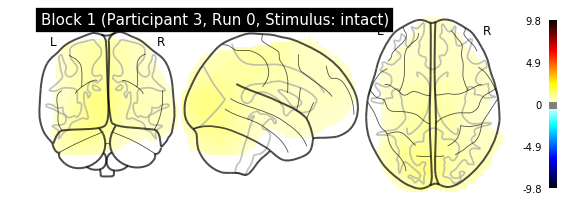

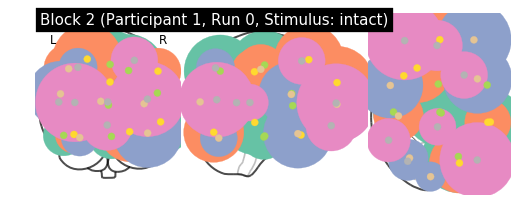

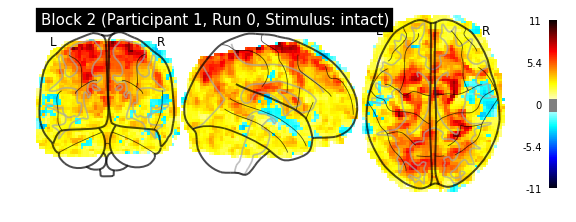

05/22/2018 23:39:52 Reconstruction Error (Frobenius Norm): 5.04615918e+03 out of 5.08477588e+03


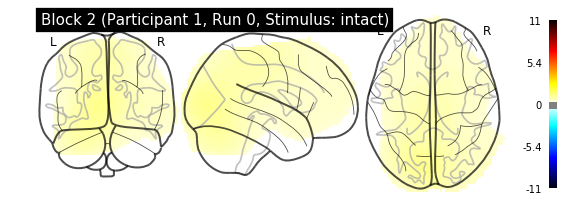

In [9]:
for b in range(dtfa.num_blocks):
    dtfa.plot_factor_centers(b)
    dtfa.plot_original_brain(b)
    dtfa.plot_reconstruction(b)

In [10]:
def task_rest_labeler(block):
    if 'rest' in block.task:
        return 'Rest'
    else:
        return 'Task'

/home/work/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


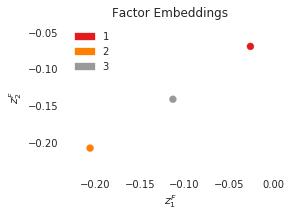

In [11]:
dtfa.scatter_factor_embedding(labeler=lambda block: block.subject)

/home/work/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


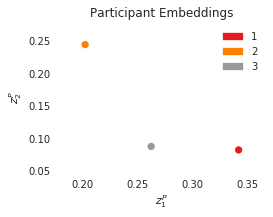

In [12]:
dtfa.scatter_subject_embedding(labeler=lambda block: block.subject)

/home/work/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


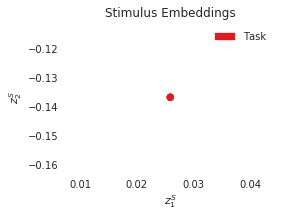

In [13]:
dtfa.scatter_task_embedding(t=None, labeler=task_rest_labeler)

In [14]:
dtfa.results(0)

{'factor_centers': 
   1.8275 -24.7955  47.5051
   3.2012 -25.5301 -28.2200
   0.0935   4.7497   4.6494
  51.6216   3.6020  17.5684
  21.2131 -71.4409  41.0356
 -46.9183 -24.6001 -27.1632
  54.9336 -35.0725 -12.9573
  22.3778 -78.2236 -23.2531
  52.2414 -35.3342  40.4086
 -36.1005  13.5762 -26.1747
   1.7395  51.4973  28.9392
 -22.0190  21.7276  53.1245
 -41.7671 -28.9395  42.8478
  41.3642  10.3552 -24.6390
 -50.2575   3.3775  16.4736
  37.7206  51.3187   6.1913
  -7.8824 -92.5878   8.6841
 -30.1984 -73.0081 -29.5406
 -32.0355 -76.5815  44.5776
 -52.0975 -54.3049   7.8190
  -1.3953  45.3294 -16.3038
  41.1797 -75.0331  10.9565
  27.5285  14.3945  51.7690
  -0.6606 -40.2032   8.0999
 -35.2236  50.4489   7.5358
 [torch.FloatTensor of size 25x3], 'factor_log_widths': 
  8.4597
  7.5981
  8.1338
  7.5276
  8.5628
  7.4446
  8.3394
  8.1963
  7.6515
  7.2871
  8.5593
  8.4749
  7.8063
  8.4605
  8.3432
  8.6312
  6.7623
  7.3090
  7.2975
  7.5676
  7.8517
  8.6417
  7.7036
  7.2377
  8.709